In [1]:
import sys
import tensorflow as tf
sys.path.append("/visuworks/Blindless_AIFFELTON/Ablation Study/")

# import customized modules
import preprocess, data_generator, check_result, metrics, loss, train

sys.path.append("/visuworks/Blindless_AIFFELTON/Ablation Study/Pyramid")
import pyramid


# Insert Path
# {model_name}_{epoch}ep_{model_inpusize}_{Generator | aG/fG/sG}
FILE_NAME = 'pyramid_50ep_512_sG_w_slice'
INPUT_SHAPE = (512, 512, 1)
RESIZE_SHAPE = (1024, 1024, 1)
MODEL_PATH = "/visuworks/Blindless_AIFFELTON/Ablation Study/Pyramid/model_parameters/" + FILE_NAME + ".tf"
HISTORY_PATH = "/visuworks/Blindless_AIFFELTON/Ablation Study/Pyramid/history/" + FILE_NAME + '_history' ".json"

TRAIN_SOURCE = '/visuworks/Dataset/Selected Dataset 3/Train'
TEST_SOURCE = '/visuworks/Dataset/Selected Dataset 3/Test'

2024-02-06 15:32:39.305251: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-06 15:32:39.305273: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-06 15:32:39.306164: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-06 15:32:39.311035: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-06 15:32:39.878232: W tensorflow/compiler/tf2

In [2]:
# Define custom objects for loading the model
custom_objects = {'DiceLoss': loss.DiceLoss(), 
                  'sensitivity': metrics.sensitivity,
                  'specificity': metrics.specificity,
                  'accuracy' : metrics.accuracy}


# Create augmentation
train_preproc = preprocess.build_augmentation_for_general(RESIZE_SHAPE[0], RESIZE_SHAPE[0])
test_preproc = preprocess.build_augmentation_for_general(RESIZE_SHAPE[0], RESIZE_SHAPE[0], is_train=False)

# Create train, test generator
train_generator = data_generator.SlicedDataGenerator(
    TRAIN_SOURCE, 
    number_of_images = 1,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    resize_shape = RESIZE_SHAPE,
    is_train=True,
    is_test=False,
    slice_black=True,
    augmentation= train_preproc
)

test_generator = data_generator.SlicedDataGenerator(
    TRAIN_SOURCE,
    number_of_images = 1,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    resize_shape = RESIZE_SHAPE,
    is_train=False,
    is_test=True,
    slice_black=True,
    augmentation= test_preproc
)

# Create model
model = pyramid.build_model(INPUT_SHAPE)
model.summary()

2024-02-06 07:53:35.872293: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-06 07:53:35.903566: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-06 07:53:35.903766: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 512, 512, 1)]        0         []                            
                                                                                                  
 conv2d_2 (Conv2D)           (None, 512, 512, 16)         32        ['input_1[0][0]']             
                                                                                                  
 conv2d (Conv2D)             (None, 512, 512, 8)          16        ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 512, 512, 16)         160       ['input_1[0][0]']             
                                                                                              

In [ ]:
train.model_train(model,
                  epoch = 50,
                  train_generator = train_generator,
                  test_generator = test_generator,
                  model_path = MODEL_PATH,
                  history_path = HISTORY_PATH,
                  save_every_epoch=True,
                  apply_weight_decay=True)

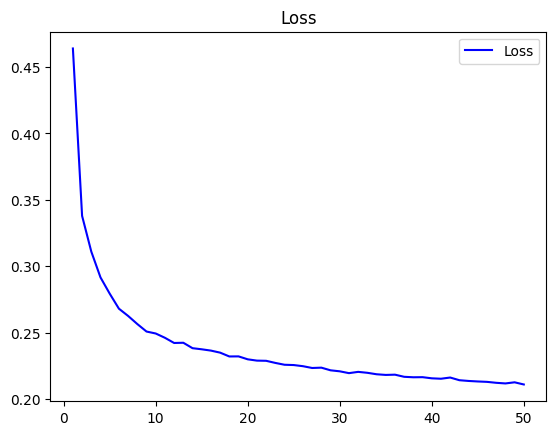

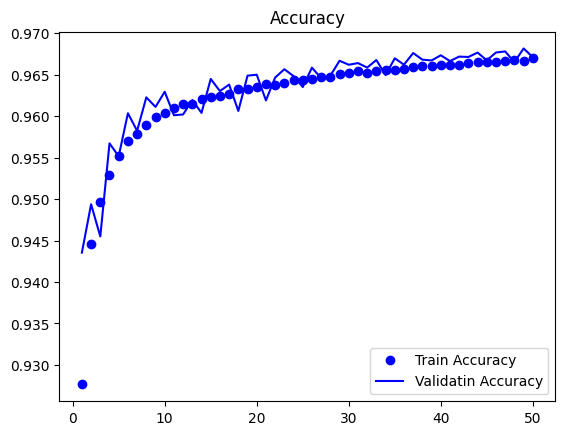

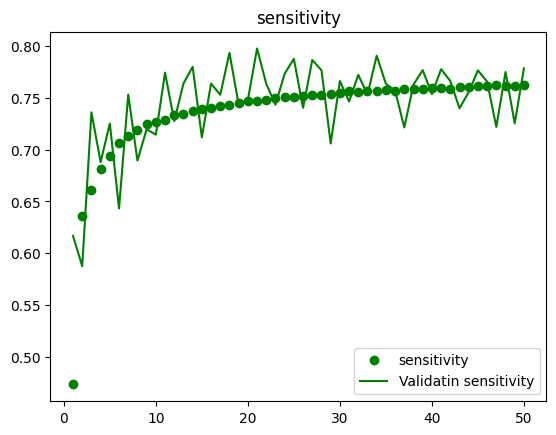

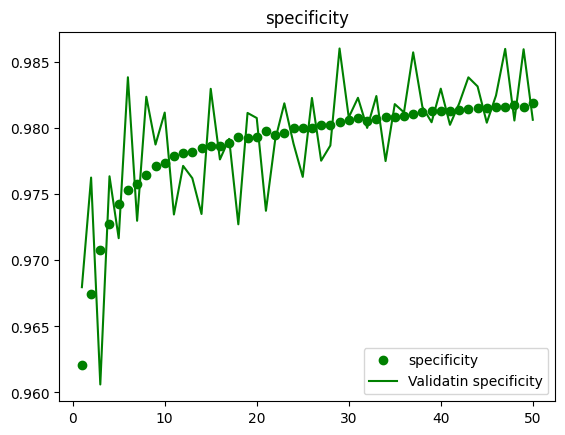

<Figure size 640x480 with 0 Axes>

In [4]:
check_result.plot_history(HISTORY_PATH)

In [3]:
custom_objects = {'DiceLoss': loss.DiceLoss(), 
                  'sensitivity': metrics.sensitivity,
                  'specificity': metrics.specificity,
                  'accuracy' : metrics.accuracy,
                  'f1_score' : metrics.f1_score,
                  'iou' : metrics.iou}

model_param_path = '/visuworks/Blindless_AIFFELTON/Ablation Study/Pyramid/model_parameters/pyramid_50ep_512_sG_w_slice.tf'
test_preproc = preprocess.build_augmentation_for_general(RESIZE_SHAPE[0], RESIZE_SHAPE[0], is_train=False)
test_generator = data_generator.SlicedDataGenerator(
    TEST_SOURCE,
    number_of_images = 1,
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    resize_shape = RESIZE_SHAPE,
    is_train=False,
    is_test=True,
    slice_black=True,
    augmentation= test_preproc
)

loss, sen, spe, acc, f1, iou = metrics.retrive_all_evaluation_of_test_dataset(test_generator, model_param_path, custom_objects)

1번째 epoch 결과


2024-02-06 15:33:21.675195: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-02-06 15:33:24.218903: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 480.12MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-02-06 15:33:24.241428: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 864.16MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-02-06 15:33:24.248675: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 865.17MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there co

305/305 [==============================] - 24s 66ms/step - loss: 0.3959 - sensitivity: 0.6036 - specificity: 0.9595 - accuracy: 0.9355 - f1_score: 0.5502 - iou: 0.3931
2번째 epoch 결과
305/305 [==============================] - 22s 69ms/step - loss: 0.3855 - sensitivity: 0.5843 - specificity: 0.9681 - accuracy: 0.9422 - f1_score: 0.5655 - iou: 0.4088
3번째 epoch 결과
305/305 [==============================] - 21s 66ms/step - loss: 0.3662 - sensitivity: 0.7117 - specificity: 0.9501 - accuracy: 0.9343 - f1_score: 0.5880 - iou: 0.4341
4번째 epoch 결과
305/305 [==============================] - 21s 65ms/step - loss: 0.3334 - sensitivity: 0.6665 - specificity: 0.9675 - accuracy: 0.9475 - f1_score: 0.6215 - iou: 0.4706
5번째 epoch 결과
305/305 [==============================] - 21s 67ms/step - loss: 0.3354 - sensitivity: 0.7005 - specificity: 0.9616 - accuracy: 0.9445 - f1_score: 0.6214 - iou: 0.4716
6번째 epoch 결과
305/305 [==============================] - 22s 71ms/step - loss: 0.3276 - sensitivity: 0.6201 -

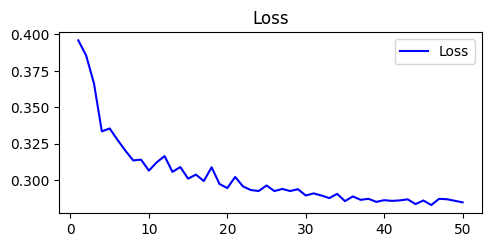

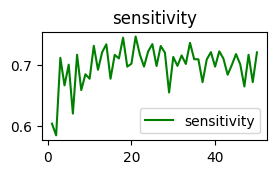

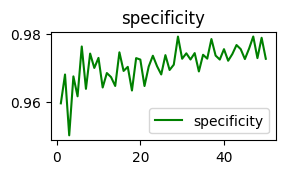

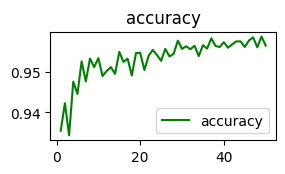

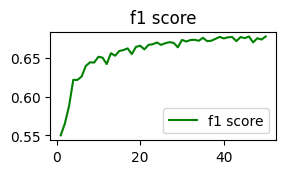

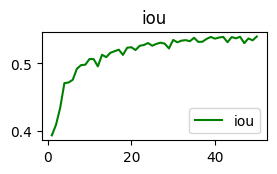

<Figure size 640x480 with 0 Axes>

: 

In [5]:
metrics.plot_test_evaluation_result(loss, sen, spe, acc, f1, iou)